# London Housing Price Data

***which boroughs of London have seen the greatest increase in housing prices, on average, over the last two decades?***


A borough is just a fancy word for district. You may be familiar with the five boroughs of New York… well, there are 32 boroughs within Greater London [(here's some info for the curious)](https://en.wikipedia.org/wiki/London_boroughs). Some of them are more desirable areas to live in, and the data will reflect that with a greater rise in housing prices.

## The Data Science Pipeline

In this case study, I get to apply some complex machine learning algorithms. But there is no substitute for simply **taking a really, really good look at the data.** Sometimes, this is all we need to answer our question.

Data Science projects generally adhere to the four stages of Data Science Pipeline:
1. Sourcing and loading 
2. Cleaning, transforming, and visualizing 
3. Modeling 
4. Evaluating and concluding 


In [1]:
pip install --upgrade openpyxl

Note: you may need to restart the kernel to use updated packages.


#### 1.1. Importing Libraries

In [2]:
# Let's import the pandas, numpy libraries as pd, and np respectively. 
import numpy as np
import pandas as pd

# Load the pyplot collection of functions from matplotlib, as plt 
import matplotlib.pyplot as plt

C:\Users\ghaza\Anaconda\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


#### 1.2.  Loading the data
our data comes from the [London Datastore](https://data.london.gov.uk/): a free, open-source data-sharing portal for London-oriented datasets. 

In [3]:
# First, make a variable called url_LondonHousePrices, and assign it the following link, enclosed in quotation-marks as a string:
# https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls

url_LondonHousePrices = "https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls"

# The dataset we're interested in contains the Average prices of the houses, and is actually on a particular sheet of the Excel file. 
# As a result, we need to specify the sheet name in the read_excel() method.
# Put this data into a variable called properties.  
properties = pd.read_excel(url_LondonHousePrices, sheet_name='Average price', index_col= None)

### 2. Cleaning, transforming, and visualizing
This second stage is arguably the most important part of any Data Science project. The first thing to do is take a proper look at the data. Cleaning forms the majority of this stage, and can be done both before or after Transformation.

The end goal of data cleaning is to have tidy data. When data is tidy: 

1. Each variable has a column.
2. Each observation forms a row.


**2.1. Exploring your data** 

Think about your pandas functions for checking out a dataframe. 

In [4]:
properties.head()

,Unnamed: 0,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England
0,NaT,E09000001,E09000002,E09000003,E09000004,E09000005,E09000006,E09000007,E09000008,E09000009,...,E12000002,E12000003,E12000004,E12000005,E12000006,E12000007,E12000008,E12000009,NaN,E92000001
1,1995-01-01,91448.98487,50460.2266,93284.51832,64958.09036,71306.56698,81671.47692,120932.8881,69158.16225,79885.89069,...,43958.48001,44803.42878,45544.52227,48527.52339,56701.5961,74435.76052,64018.87894,54705.1579,NaN,53202.77128
2,1995-02-01,82202.77314,51085.77983,93190.16963,64787.92069,72022.26197,81657.55944,119508.8622,68951.09542,80897.06551,...,43925.42289,44528.80721,46051.57066,49341.29029,56593.59475,72777.93709,63715.02399,54356.14843,NaN,53096.1549
3,1995-03-01,79120.70256,51268.96956,92247.52435,64367.49344,72015.76274,81449.31143,120282.2131,68712.44341,81379.86288,...,44434.8681,45200.46775,45383.82395,49442.17973,56171.18278,73896.84204,64113.60858,53583.07667,NaN,53201.2843
4,1995-04-01,77101.20804,53133.50526,90762.87492,64277.66881,72965.63094,81124.41227,120097.899,68610.04641,82188.90498,...,44267.7796,45614.34341,46124.23045,49455.93299,56567.89582,74455.28754,64623.22395,54786.01938,NaN,53590.8548


In [5]:
properties.shape

(353, 49)

**2.2. Cleaning the data**

You might find you need to transpose your dataframe, check out what its row indexes are, and reset the index. You  also might find you need to assign the values of the first row to your column headings  . (Hint: recall the .columns feature of DataFrames, as well as the iloc[] method).

Don't be afraid to use StackOverflow for help  with this.

In [6]:
properties_t=properties.transpose()
properties_t.head()

,0,1,2,3,4,5,6,7,8,9,...,343,344,345,346,347,348,349,350,351,352
Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,1995-09-01 00:00:00,...,2023-07-01 00:00:00,2023-08-01 00:00:00,2023-09-01 00:00:00,2023-10-01 00:00:00,2023-11-01 00:00:00,2023-12-01 00:00:00,2024-01-01 00:00:00,2024-02-01 00:00:00,2024-03-01 00:00:00,2024-04-01 00:00:00
City of London,E09000001,91448.98487,82202.77314,79120.70256,77101.20804,84409.14932,94900.51244,110128.0423,112329.4376,104473.1096,...,1008012,936702,896682,854727,837486,804808,798179,785962,755712,778946
Barking & Dagenham,E09000002,50460.2266,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157,52232.19868,51471.61353,...,338138,339563,337649,337933,341026,337725,328359,319809,326650,333425
Barnet,E09000003,93284.51832,93190.16963,92247.52435,90762.87492,90258.00033,90107.23471,91441.24768,92361.31512,93273.12245,...,589701,591563,588233,579669,581615,581371,581246,573653,582371,573010
Bexley,E09000004,64958.09036,64787.92069,64367.49344,64277.66881,63997.13588,64252.32335,63722.70055,64432.60005,64509.54767,...,397933,396647,397348,393723,398080,394474,395468,395439,400146,404557


In [7]:
properties_t.index

Index(['Unnamed: 0', 'City of London', 'Barking & Dagenham', 'Barnet',
       'Bexley', 'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey', 'Harrow',
       'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington & Chelsea', 'Kingston upon Thames', 'Lambeth', 'Lewisham',
       'Merton', 'Newham', 'Redbridge', 'Richmond upon Thames', 'Southwark',
       'Sutton', 'Tower Hamlets', 'Waltham Forest', 'Wandsworth',
       'Westminster', 'Unnamed: 34', 'Inner London', 'Outer London',
       'Unnamed: 37', 'NORTH EAST', 'NORTH WEST', 'YORKS & THE HUMBER',
       'EAST MIDLANDS', 'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON',
       'SOUTH EAST', 'SOUTH WEST', 'Unnamed: 47', 'England'],
      dtype='object')

In [8]:
properties_t = properties_t.reset_index()
properties_t.head()

,index,0,1,2,3,4,5,6,7,8,...,343,344,345,346,347,348,349,350,351,352
0,Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2023-07-01 00:00:00,2023-08-01 00:00:00,2023-09-01 00:00:00,2023-10-01 00:00:00,2023-11-01 00:00:00,2023-12-01 00:00:00,2024-01-01 00:00:00,2024-02-01 00:00:00,2024-03-01 00:00:00,2024-04-01 00:00:00
1,City of London,E09000001,91448.98487,82202.77314,79120.70256,77101.20804,84409.14932,94900.51244,110128.0423,112329.4376,...,1008012,936702,896682,854727,837486,804808,798179,785962,755712,778946
2,Barking & Dagenham,E09000002,50460.2266,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157,52232.19868,...,338138,339563,337649,337933,341026,337725,328359,319809,326650,333425
3,Barnet,E09000003,93284.51832,93190.16963,92247.52435,90762.87492,90258.00033,90107.23471,91441.24768,92361.31512,...,589701,591563,588233,579669,581615,581371,581246,573653,582371,573010
4,Bexley,E09000004,64958.09036,64787.92069,64367.49344,64277.66881,63997.13588,64252.32335,63722.70055,64432.60005,...,397933,396647,397348,393723,398080,394474,395468,395439,400146,404557


**2.3. Cleaning the data (part 2)**

You might we have to **rename** a couple columns.

In [9]:
properties_t.columns

Index(['index',       0,       1,       2,       3,       4,       5,       6,
             7,       8,
       ...
           343,     344,     345,     346,     347,     348,     349,     350,
           351,     352],
      dtype='object', length=354)

In [10]:
properties_t.iloc[[0]]

,index,0,1,2,3,4,5,6,7,8,...,343,344,345,346,347,348,349,350,351,352
0,Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2023-07-01 00:00:00,2023-08-01 00:00:00,2023-09-01 00:00:00,2023-10-01 00:00:00,2023-11-01 00:00:00,2023-12-01 00:00:00,2024-01-01 00:00:00,2024-02-01 00:00:00,2024-03-01 00:00:00,2024-04-01 00:00:00


In [11]:
properties_t.columns=properties_t.iloc[0]
properties_t=properties_t.drop(0)
properties_t.head()

,Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2023-07-01 00:00:00,2023-08-01 00:00:00,2023-09-01 00:00:00,2023-10-01 00:00:00,2023-11-01 00:00:00,2023-12-01 00:00:00,2024-01-01 00:00:00,2024-02-01 00:00:00,2024-03-01 00:00:00,2024-04-01 00:00:00
1,City of London,E09000001,91448.98487,82202.77314,79120.70256,77101.20804,84409.14932,94900.51244,110128.0423,112329.4376,...,1008012,936702,896682,854727,837486,804808,798179,785962,755712,778946
2,Barking & Dagenham,E09000002,50460.2266,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157,52232.19868,...,338138,339563,337649,337933,341026,337725,328359,319809,326650,333425
3,Barnet,E09000003,93284.51832,93190.16963,92247.52435,90762.87492,90258.00033,90107.23471,91441.24768,92361.31512,...,589701,591563,588233,579669,581615,581371,581246,573653,582371,573010
4,Bexley,E09000004,64958.09036,64787.92069,64367.49344,64277.66881,63997.13588,64252.32335,63722.70055,64432.60005,...,397933,396647,397348,393723,398080,394474,395468,395439,400146,404557
5,Brent,E09000005,71306.56698,72022.26197,72015.76274,72965.63094,73704.04743,74310.48167,74127.03788,73547.0411,...,512835,530319,529274,528081,515182,507592,520722,527606,510427,488462


In [12]:
properties_t = properties_t.rename(columns = {'Unnamed: 0':'London_Borough', pd.NaT: 'ID'})
properties_t.head()

,London_Borough,ID,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2023-07-01 00:00:00,2023-08-01 00:00:00,2023-09-01 00:00:00,2023-10-01 00:00:00,2023-11-01 00:00:00,2023-12-01 00:00:00,2024-01-01 00:00:00,2024-02-01 00:00:00,2024-03-01 00:00:00,2024-04-01 00:00:00
1,City of London,E09000001,91448.98487,82202.77314,79120.70256,77101.20804,84409.14932,94900.51244,110128.0423,112329.4376,...,1008012,936702,896682,854727,837486,804808,798179,785962,755712,778946
2,Barking & Dagenham,E09000002,50460.2266,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157,52232.19868,...,338138,339563,337649,337933,341026,337725,328359,319809,326650,333425
3,Barnet,E09000003,93284.51832,93190.16963,92247.52435,90762.87492,90258.00033,90107.23471,91441.24768,92361.31512,...,589701,591563,588233,579669,581615,581371,581246,573653,582371,573010
4,Bexley,E09000004,64958.09036,64787.92069,64367.49344,64277.66881,63997.13588,64252.32335,63722.70055,64432.60005,...,397933,396647,397348,393723,398080,394474,395468,395439,400146,404557
5,Brent,E09000005,71306.56698,72022.26197,72015.76274,72965.63094,73704.04743,74310.48167,74127.03788,73547.0411,...,512835,530319,529274,528081,515182,507592,520722,527606,510427,488462


**2.4.Transforming the data**

Remember what Wes McKinney said about tidy data? 

You might need to **melt** your DataFrame here. 

In [13]:
clean_properties = pd.melt(properties_t, id_vars= ['London_Borough', 'ID'],var_name="Month",value_name="Average_price")

In [14]:
clean_properties.head()

,London_Borough,ID,Month,Average_price
0,City of London,E09000001,1995-01-01 00:00:00,91448.98487
1,Barking & Dagenham,E09000002,1995-01-01 00:00:00,50460.2266
2,Barnet,E09000003,1995-01-01 00:00:00,93284.51832
3,Bexley,E09000004,1995-01-01 00:00:00,64958.09036
4,Brent,E09000005,1995-01-01 00:00:00,71306.56698


Remember to make sure your column data types are all correct. Average prices, for example, should be floating point numbers... 

In [15]:
clean_properties.dtypes

London_Borough    object
ID                object
Month             object
Average_price     object
dtype: object

In [16]:
clean_properties['Average_price'] = pd.to_numeric(clean_properties['Average_price'])
clean_properties.dtypes

London_Borough     object
ID                 object
Month              object
Average_price     float64
dtype: object

In [17]:
clean_properties.count()

London_Borough    16896
ID                15840
Month             16896
Average_price     15840
dtype: int64

**2.5. Cleaning the data (part 3)**

Do we have an equal number of observations in the ID, Average Price, Month, and London Borough columns? Remember that there are only 32 London Boroughs. How many entries do you have in that column? 

Check out the contents of the London Borough column, and if you find null values, get rid of them however you see fit. 

In [18]:
clean_properties['London_Borough'].unique()

array(['City of London', 'Barking & Dagenham', 'Barnet', 'Bexley',
       'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey',
       'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington & Chelsea', 'Kingston upon Thames', 'Lambeth',
       'Lewisham', 'Merton', 'Newham', 'Redbridge',
       'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets',
       'Waltham Forest', 'Wandsworth', 'Westminster', 'Unnamed: 34',
       'Inner London', 'Outer London', 'Unnamed: 37', 'NORTH EAST',
       'NORTH WEST', 'YORKS & THE HUMBER', 'EAST MIDLANDS',
       'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON', 'SOUTH EAST',
       'SOUTH WEST', 'Unnamed: 47', 'England'], dtype=object)

In [19]:
clean_properties[clean_properties['London_Borough'] == 'unnamed:47'].head()


,London_Borough,ID,Month,Average_price


In [20]:
NaNFreeDF1 = clean_properties.loc[clean_properties['Average_price'].notna()].copy()
NaNFreeDF1.head(10)

,London_Borough,ID,Month,Average_price
0,City of London,E09000001,1995-01-01 00:00:00,91448.98487
1,Barking & Dagenham,E09000002,1995-01-01 00:00:00,50460.22660
2,Barnet,E09000003,1995-01-01 00:00:00,93284.51832
3,Bexley,E09000004,1995-01-01 00:00:00,64958.09036
4,Brent,E09000005,1995-01-01 00:00:00,71306.56698
5,Bromley,E09000006,1995-01-01 00:00:00,81671.47692
6,Camden,E09000007,1995-01-01 00:00:00,120932.88810
7,Croydon,E09000008,1995-01-01 00:00:00,69158.16225
8,Ealing,E09000009,1995-01-01 00:00:00,79885.89069
9,Enfield,E09000010,1995-01-01 00:00:00,72514.69096


In [21]:
NaNFreeDF1.count()

London_Borough    15840
ID                15840
Month             15840
Average_price     15840
dtype: int64

**2.6. Visualizing the data**

To visualize the data, why not subset on a particular London Borough? Maybe do a line plot of Month against Average Price?

C:\Users\ghaza\Anaconda\Lib\site-packages\pandas\core\indexes\base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


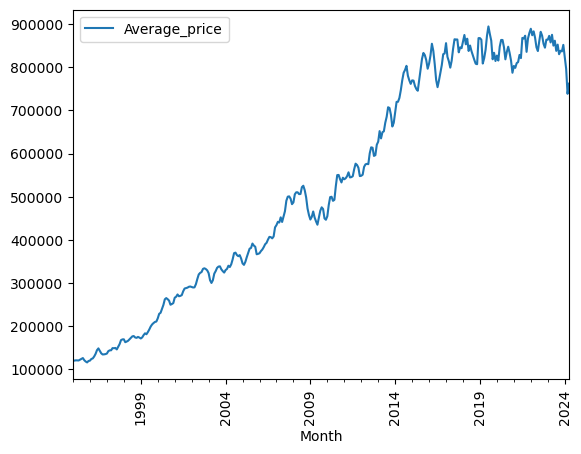

In [22]:
NaNFreeDF1[NaNFreeDF1["London_Borough"]=='Camden'].plot(x="Month", y="Average_price", kind='line',rot=90)
plt.show()

To limit the number of data points you have, you might want to extract the year from every month value your *Month* column. 

To this end, you *could* apply a ***lambda function***. Your logic could work as follows:
1. look through the `Month` column
2. extract the year from each individual value in that column 
3. store that corresponding year as separate column. 

Whether you go ahead with this is up to you. Just so long as you answer our initial brief: which boroughs of London have seen the greatest house price increase, on average, over the past two decades? 

In [23]:
NaNFreeDF1['Year'] = NaNFreeDF1['Month'].apply(lambda t: t.year)
NaNFreeDF1.tail()

,London_Borough,ID,Month,Average_price,Year
16890,EAST OF ENGLAND,E12000006,2024-04-01 00:00:00,335448.0,2024
16891,LONDON,E12000007,2024-04-01 00:00:00,501880.0,2024
16892,SOUTH EAST,E12000008,2024-04-01 00:00:00,375067.0,2024
16893,SOUTH WEST,E12000009,2024-04-01 00:00:00,317911.0,2024
16895,England,E92000001,2024-04-01 00:00:00,298229.0,2024


In [24]:
dfg = NaNFreeDF1.groupby(["London_Borough","Year"])["Average_price"].mean().reset_index()
dfg.sample(10)

,London_Borough,Year,Average_price
474,Hammersmith & Fulham,2019,717794.663575
264,EAST MIDLANDS,2019,193008.190600
860,Merton,2015,457702.109258
1057,SOUTH EAST,2002,151274.800017
967,Outer London,2002,172209.210192
417,Greenwich,2022,443286.500000
964,Outer London,1999,107308.681150
3,Barking & Dagenham,1998,60285.821083
239,Croydon,2024,393010.750000
1071,SOUTH EAST,2016,303754.675817


**3. Modeling**

Consider creating a function that will calculate a ratio of house prices, comparing the price of a house in 2018 to the price in 1998.

Consider calling this function create_price_ratio.

You'd want this function to:
1. Take a filter of dfg, specifically where this filter constrains the London_Borough, as an argument. For example, one admissible argument should be: dfg[dfg['London_Borough']=='Camden'].
2. Get the Average Price for that Borough, for the years 1998 and 2018.
4. Calculate the ratio of the Average Price for 1998 divided by the Average Price for 2018.
5. Return that ratio.

Once you've written this function, you ultimately want to use it to iterate through all the unique London_Boroughs and work out the ratio capturing the difference of house prices between 1998 and 2018.

Bear in mind: you don't have to write a function like this if you don't want to. If you can solve the brief otherwise, then great! 

In [25]:
def create_price_ratio (df):
    y1998 = df['Average_price'][df['Year']==1998].astype(float).reset_index(drop=True)
    y2018 = df['Average_price'][df['Year']==2018].astype(float).reset_index(drop=True)
    ratio = y2018.iloc[0] / y1998.iloc[0]
    return ratio
create_price_ratio(dfg[dfg['London_Borough']=='LONDON'])

4.679776249632861

In [26]:
final={}
for Borough in dfg['London_Borough'].unique():
    final[Borough] = create_price_ratio(dfg[dfg['London_Borough'] == Borough])
dt_list=list(final.items())
df_ratios=pd.DataFrame(dt_list,columns=["Borough","Ratio"])   
df_ratios.head()

,Borough,Ratio
0,Barking & Dagenham,4.896619
1,Barnet,4.358196
2,Bexley,4.248977
3,Brent,4.894554
4,Bromley,4.094785


In [27]:
top15 = df_ratios.sort_values(by='Ratio',ascending=False).head(15)
print(top15)

                 Borough     Ratio
14               Hackney  6.198286
41        Waltham Forest  5.834756
37             Southwark  5.516485
27              Lewisham  5.449221
43           Westminster  5.353565
31                Newham  5.305390
6         City of London  5.301620
21          Inner London  5.170858
16              Haringey  5.134625
23  Kensington & Chelsea  5.082465
26               Lambeth  4.957751
5                 Camden  4.935353
0     Barking & Dagenham  4.896619
3                  Brent  4.894554
22             Islington  4.844048


### 4. Conclusion
What can you conclude? Type out your conclusion below. 

Look back at your notebook. Think about how you might summarize what you have done, and prepare a quick presentation on it to your mentor at your next meeting. 

We hope you enjoyed this practical project. It should have consolidated your data hygiene and pandas skills by looking at a real-world problem involving just the kind of dataset you might encounter as a budding data scientist. Congratulations, and looking forward to seeing you at the next step in the course! 

[Text(0, 0, 'Hackney'),
 Text(1, 0, 'Waltham Forest'),
 Text(2, 0, 'Southwark'),
 Text(3, 0, 'Lewisham'),
 Text(4, 0, 'Westminster'),
 Text(5, 0, 'Newham'),
 Text(6, 0, 'City of London'),
 Text(7, 0, 'Inner London'),
 Text(8, 0, 'Haringey'),
 Text(9, 0, 'Kensington & Chelsea'),
 Text(10, 0, 'Lambeth'),
 Text(11, 0, 'Camden'),
 Text(12, 0, 'Barking & Dagenham'),
 Text(13, 0, 'Brent'),
 Text(14, 0, 'Islington')]

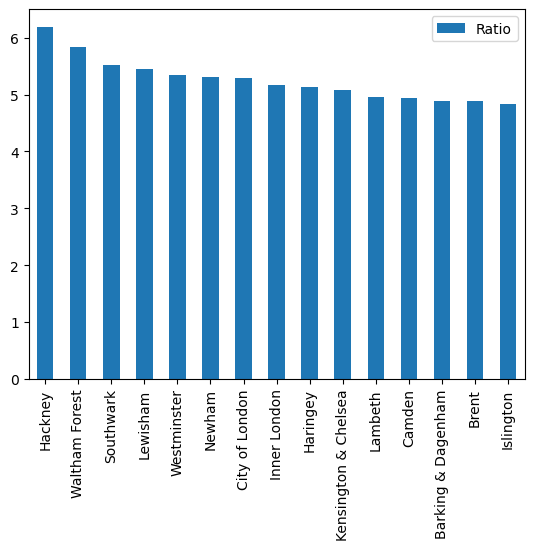

In [28]:
ax = top15[['Borough','Ratio']].plot(kind='bar')

ax.set_xticklabels(top15.Borough)

The chart above lists the top 15 boroughs that have experienced the most significant average rise in housing prices over roughly the last twenty years (from 1998 to 2018). Leading the way is Hackney, which has seen an astounding increase of 6.19 times in the average housing price since 1998.